In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cluster Centers:
 [[-0.48677585 -0.24278217 -0.50264928 -0.48100231 -0.28970632 -0.50038248
  -0.56494861 -0.57746231 -0.29773585 -0.11313275 -0.42589487 -0.02179192
  -0.4265603  -0.40154836 -0.00606408 -0.34186354 -0.31568456 -0.38077004
  -0.06808833 -0.19927499 -0.51920227 -0.25513563 -0.53177588 -0.50030552
  -0.29509774 -0.47017523 -0.51882214 -0.56907669 -0.29577329 -0.30278364]
 [ 0.98649786  0.49202131  1.01866689  0.97479724  0.5871176   1.014073
   1.14492245  1.17028266  0.60339021  0.22927434  0.86311672  0.04416341
   0.86446528  0.8137762   0.01228944  0.69281919  0.63976499  0.77166695
   0.13798752  0.40384985  1.05221312  0.51705679  1.07769473  1.01391704
   0.59804381  0.95285513  1.05144274  1.15328841  0.5994129   0.61362004]]
Labels: [1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0

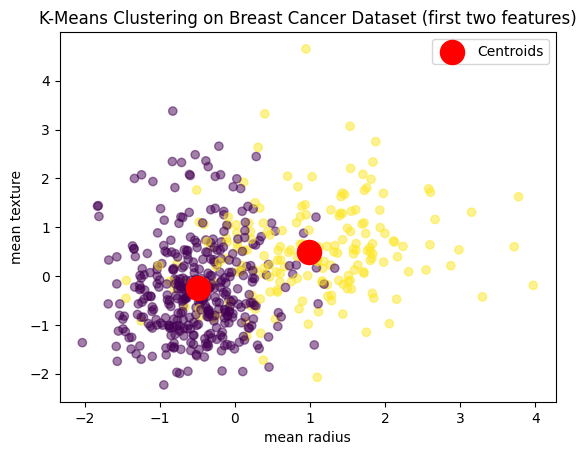

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target  # True labels (for comparison purposes)

# Standardize the data for better performance with K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.predict(X_scaled)

# Print the cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Labels:", labels)

# Calculate the number of samples that match the actual cancer types
correct_labels = sum(y == labels)
print(f"Accuracy of K-Means clustering: {correct_labels / len(y):.2f}")

# Visualizing the first two features with cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("K-Means Clustering on Breast Cancer Dataset (first two features)")
plt.legend()
plt.show()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

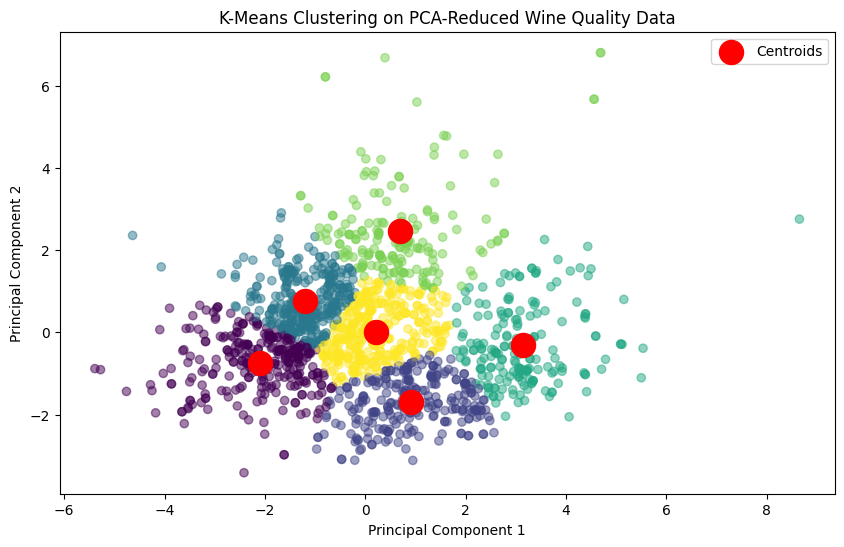

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Wine Quality dataset
# You can also load it using a URL if needed
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())

# Separate features and target variable (quality)
X = data.drop('quality', axis=1)
y = data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the KMeans model with a specified number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)  # 6 clusters for wine quality
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.predict(X_scaled)

# Print the cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Labels:", labels)

# Calculate the number of samples that match the actual quality ratings
correct_labels = sum(y == labels)
print(f"Accuracy of K-Means clustering: {correct_labels / len(y):.2f}")

# Visualizing the clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=6, random_state=0)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.predict(X_pca)

# Plot the PCA-reduced clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Wine Quality Data")
plt.legend()
plt.show()


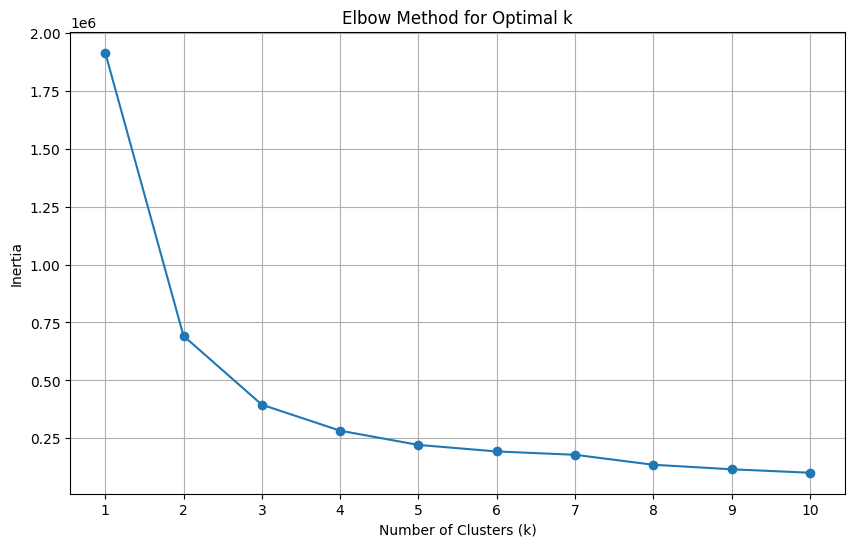

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Wine Quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Separate features from the target variable
X = data.drop('quality', axis=1)

# List to store inertia values
inertia = []

# Calculate inertia for a range of k values
k_values = range(1, 11)  # Trying k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the inertia value

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

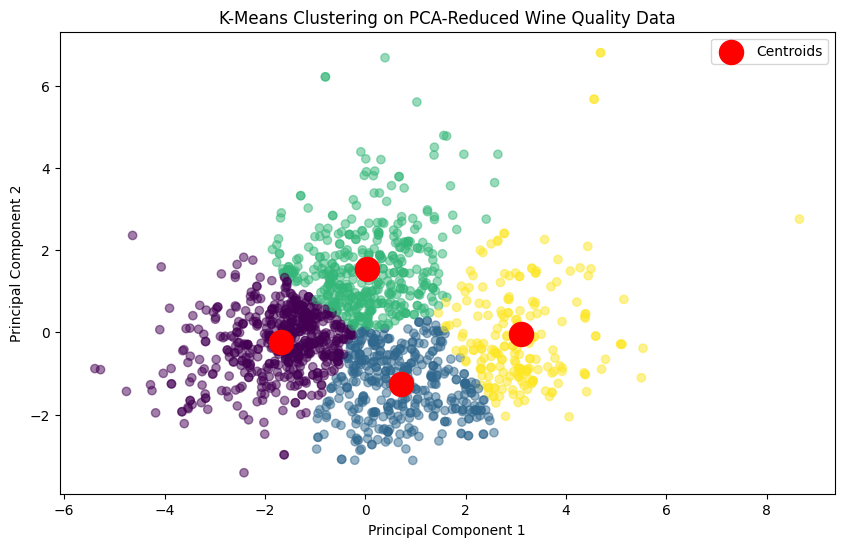

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Wine Quality dataset
# You can also load it using a URL if needed
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())

# Separate features and target variable (quality)
X = data.drop('quality', axis=1)
y = data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the KMeans model with a specified number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)  # 6 clusters for wine quality
kmeans.fit(X_scaled)

# Predict cluster labels
labels = kmeans.predict(X_scaled)

# Print the cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Labels:", labels)

# Calculate the number of samples that match the actual quality ratings
correct_labels = sum(y == labels)
print(f"Accuracy of K-Means clustering: {correct_labels / len(y):.2f}")

# Visualizing the clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit KMeans on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=4, random_state=0)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.predict(X_pca)

# Plot the PCA-reduced clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Wine Quality Data")
plt.legend()
plt.show()


In [12]:

# Count the number of elements in each cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Display the counts of elements in each cluster
print("Number of elements in each cluster:")
print(cluster_counts)

Number of elements in each cluster:
0    315
1    553
2    398
3    333
Name: count, dtype: int64


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the Wine Quality dataset
url = '/content/drive/MyDrive/Colab Notebooks/ML datasets/Housing_Price.csv'
data = pd.read_csv(url)

# Assuming 'X' is your DataFrame containing features
X = data.drop('price', axis=1)

# Identify categorical columns (columns containing strings)
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert string values to numerical labels

# List to store inertia values
inertia = []

# Calculate inertia for a range of k values
k_values = range(1, 11)  # Trying k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the inertia value

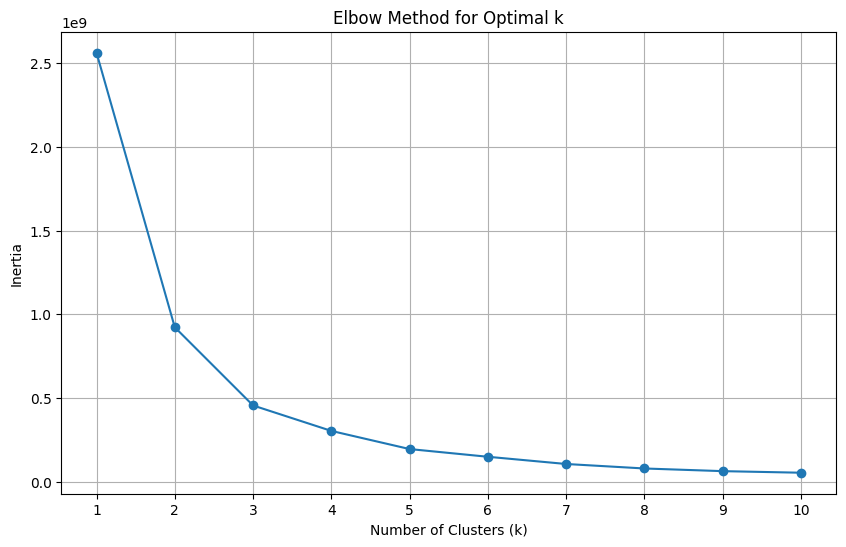

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [20]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Predict cluster labels
kmeans = kmeans.labels_

# Count the number of elements in each cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Display the counts of elements in each cluster
print("Number of elements in each cluster:")
print(cluster_counts)

Number of elements in each cluster:
0    103
1    255
2     24
3    163
Name: count, dtype: int64


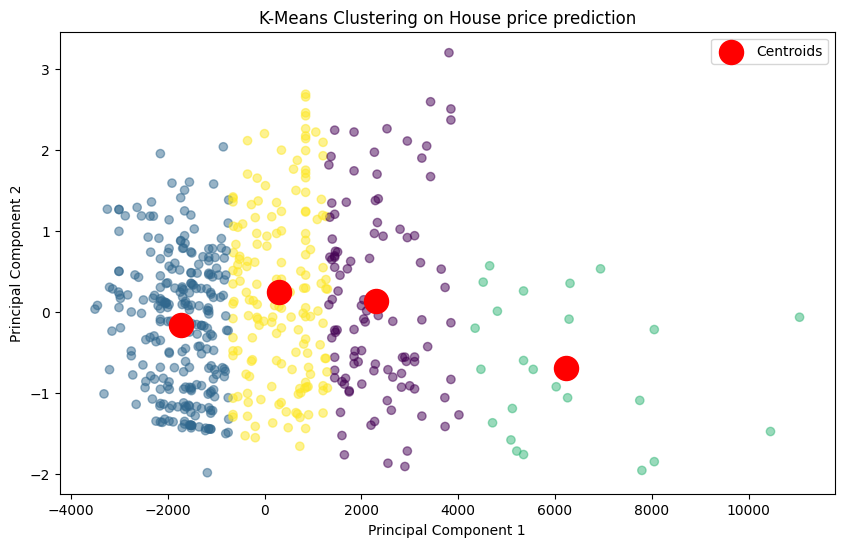

In [22]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=k, random_state=0)
kmeans_pca.fit(X_pca)

# Predict labels for PCA-reduced data
labels_pca = kmeans_pca.labels_

# Visualization of K-Means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on House price prediction")
plt.legend()
plt.show()